# Week 2 - Preprocessing, part 2

# 1. Lesson: None

# 2. Weekly graph question

The Storytelling With Data book mentions planning on a "Who, What, and How" for your data story.  Write down a possible Who, What, and How for your data, using the ideas in the book.

In [1]:
#Who: Risk Management team at an bank.

#What: Being a liason to the risk management team to understand a predictive model that I had developed.
#making sure to get approval for pilot testing of the model and resource allocation to support the development and deployment.

#How: Deliver a live presentation using a slide deck. The visuals will highlight the model’s performance followed up with a detailed report documenting the methodology, performance metrics, and data used, for stakeholders to review asynchronously.

# 3. Homework - work with your own data

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do  Use Google, documentation, and ChatGPT to help you:

- Summarize the datasets using info() and describe()

- Are there any duplicate rows?

- Are there any duplicate values in a given column (when this would be inappropriate?)

- What are the mean, median, and mode of each column?

- Are there any missing or null values?

    - Do you want to fill in the missing value with a mean value?  A value of your choice?  Remove that row?

- Identify any other inconsistent data (e.g. someone seems to be taking an action before they are born.)

- Encode any categorical variables (e.g. with one-hot encoding.)

### Conclusions:

- Are the data usable?  If not, find some new data!

- Do you need to modify or correct the data in some way?

- Is there any class imbalance?  (Categories that have many more items than other categories).

In [3]:
!pip install kagglehub

In [4]:

import kagglehub
import os


/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Credit Card Fraud Dataset

In [5]:
path = kagglehub.dataset_download("tusharbhadouria/credit-card-fraud-detection")
print("Path to dataset files:", path)


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/tusharbhadouria/credit-card-fraud-detection/versions/1


In [6]:
credit_fraud_path_to_file = os.path.join(path, "fraudTrain.csv")
credit_fraud_raw_train = pd.read_csv(credit_fraud_path_to_file)

credit_fraud_path_to_file_test = os.path.join(path,"fraudTest.csv")
credit_fraud_raw_test = pd.read_csv(credit_fraud_path_to_file_test)


In [7]:
#info and describe for datat
print(" Info for fraudTrain.csv ")
credit_fraud_raw_train.info()

print("\n Describe for fraudTrain.csv ")
credit_fraud_raw_train.describe()


 Info for fraudTrain.csv 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,6.483370e+05,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,3.743180e+05,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,3.241685e+05,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,6.483370e+05,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,9.725055e+05,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [8]:
print("\n Info for fraudTest.csv ")
credit_fraud_raw_test.info()

print("\n Describe for fraudTest.csv ")
credit_fraud_raw_test.describe()


 Info for fraudTest.csv 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long      

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,277859.000000,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1.385867e+09,41.954163,-80.264637,0.000000
max,555718.000000,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.679297,-66.952026,1.000000


In [9]:
#Summing up how many duplicates there are
duplicate_rows_train = credit_fraud_raw_train.duplicated().sum()
print(f"Number of duplicate rows in fraudTrain.csv: {duplicate_rows_train}")

duplicate_rows_test = credit_fraud_raw_test.duplicated().sum()
print(f"Number of duplicate rows in fraudTest.csv: {duplicate_rows_test}")

#dropping duplicates
if duplicate_rows_train > 0:
    credit_fraud_raw_train_cleaned = credit_fraud_raw_train.drop_duplicates().copy()
    print(f"Removed {duplicate_rows_train} duplicate rows from fraudTrain.csv.")
    print(f"New shape of fraudTrain.csv: {credit_fraud_raw_train_cleaned.shape}")
else:
    credit_fraud_raw_train_cleaned = credit_fraud_raw_train.copy() # Create a copy even if no duplicates
    print("No full duplicate rows found in fraudTrain.csv.")

if duplicate_rows_test > 0:
    credit_fraud_raw_test_cleaned = credit_fraud_raw_test.drop_duplicates().copy()
    print(f"Removed {duplicate_rows_test} duplicate rows from fraudTest.csv.")
    print(f"New shape of fraudTest.csv: {credit_fraud_raw_test_cleaned.shape}")
else:
    credit_fraud_raw_test_cleaned = credit_fraud_raw_test.copy() # Create a copy even if no duplicates
    print("No full duplicate rows found in fraudTest.csv.")


Number of duplicate rows in fraudTrain.csv: 0
Number of duplicate rows in fraudTest.csv: 0
No full duplicate rows found in fraudTrain.csv.
No full duplicate rows found in fraudTest.csv.


In [10]:
#Checking for duplicates in column where this would be inappropriate
unique_id_column = 'trans_num'  #Going to check transaction number column where which each transaction should have a unique number

if unique_id_column in credit_fraud_raw_train_cleaned.columns:
    duplicate_ids_train = credit_fraud_raw_train_cleaned[unique_id_column].duplicated().sum()
    print(f"\nNumber of duplicate {unique_id_column} in fraudTrain.csv: {duplicate_ids_train}")

    if duplicate_ids_train > 0:
        print(f"Warning: Duplicate values found in {unique_id_column}. This might be an issue if it's supposed to be a unique identifier.")
    else:
        print(f"No duplicate values found in {unique_id_column} in fraudTrain.csv.")
else:
    print(f"\nNo column named '{unique_id_column}' found in fraudTrain.csv to check for unique IDs.")
    print("This step is typically applied to columns that are expected to be unique identifiers (e.g., customer IDs, order IDs).")



Number of duplicate trans_num in fraudTrain.csv: 0
No duplicate values found in trans_num in fraudTrain.csv.


In [11]:
#Finding mean, median, and mode, for each column
means = credit_fraud_raw_train_cleaned.mean(numeric_only=True)
medians = credit_fraud_raw_train_cleaned.median(numeric_only=True)
modes = credit_fraud_raw_train_cleaned.mode(numeric_only=True).iloc[0]

summary = pd.DataFrame({
    'Mean': means,
    'Median': medians,
    'Mode': modes
})

print(summary)


                    Mean        Median          Mode
Unnamed: 0  6.483370e+05  6.483370e+05  0.000000e+00
cc_num      4.171920e+17  3.521417e+15  5.713652e+11
amt         7.035104e+01  4.752000e+01  1.140000e+00
zip         4.880067e+04  4.817400e+04  7.375400e+04
lat         3.853762e+01  3.935430e+01  3.638500e+01
long       -9.022634e+01 -8.747690e+01 -9.807270e+01
city_pop    8.882444e+04  2.456000e+03  6.060000e+02
unix_time   1.349244e+09  1.349250e+09  1.335111e+09
merch_lat   3.853734e+01  3.936568e+01  3.264469e+01
merch_long -9.022646e+01 -8.743839e+01 -8.711641e+01
is_fraud    5.788652e-03  0.000000e+00  0.000000e+00


In [12]:
#Finding missing values
missing_train = credit_fraud_raw_train_cleaned.isnull().sum()
print(missing_train[missing_train > 0])

missing_test = credit_fraud_raw_test_cleaned.isnull().sum()
print(missing_test[missing_test > 0])

Series([], dtype: int64)
Series([], dtype: int64)


Conclusion:
The data is usable but would require some preprocessing to make sure that all data is accurate and consistent. 

This particular dataset did not needed to be modified or corrected. From my EDA it looks like there are no missing values or any duplicate values (where inappropriate), however the data should be sifted for any erroneous values, such as negative numbers where not appropriate (i.e. transaction amount).

In fraud dataset there is explicit class imbalance. This is because of the distribution of non-fraudulent transactions versus fradualent transactions. This could lead to skewed performance of the model. A way strong way to mitigate this is by using models that handle this imbalance well such as decision trees.



# Credit Card Approval Dataset

In [13]:
import zipfile

In [14]:
# Extract files and using "cca" to distinct from other datasets 
zip_file_path_cca = "cc_approval.zip"  
extracted_dir_cca = "extracted_data_cca"

os.makedirs(extracted_dir_cca, exist_ok=True)

try:
    with zipfile.ZipFile(zip_file_path_cca, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_cca)
    print(f"Successfully unzipped '{zip_file_path_cca}' to '{extracted_dir_cca}'")

    # List contents
    print(f"\nContents of '{extracted_dir_cca}':")
    for item in os.listdir(extracted_dir_cca):
        print(f"- {item}")

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path_cca}' was not found. Check the path.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path_cca}' is not a valid ZIP file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully unzipped 'cc_approval.zip' to 'extracted_data_cca'

Contents of 'extracted_data_cca':
- Application_Data.csv


In [15]:
csv_file_name_cca = "Application_Data.csv"
full_csv_path_cca = os.path.join(extracted_dir_cca, csv_file_name_cca)

df_cca =pd.read_csv(full_csv_path_cca)

print("\nDataFrame Info (df_cca.info()):")
df_cca.info()


DataFrame Info (df_cca.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25128 entries, 0 to 25127
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Applicant_ID          25128 non-null  int64 
 1   Applicant_Gender      25128 non-null  object
 2   Owned_Car             25128 non-null  int64 
 3   Owned_Realty          25128 non-null  int64 
 4   Total_Children        25128 non-null  int64 
 5   Total_Income          25128 non-null  int64 
 6   Income_Type           25128 non-null  object
 7   Education_Type        25128 non-null  object
 8   Family_Status         25128 non-null  object
 9   Housing_Type          25128 non-null  object
 10  Owned_Mobile_Phone    25128 non-null  int64 
 11  Owned_Work_Phone      25128 non-null  int64 
 12  Owned_Phone           25128 non-null  int64 
 13  Owned_Email           25128 non-null  int64 
 14  Job_Title             25128 non-null  object
 15  Tot

In [16]:
print("\nDescriptive Statistics for Numerical Columns (df_cca.describe()):")
print(df_cca.describe())


Descriptive Statistics for Numerical Columns (df_cca.describe()):
       Applicant_ID     Owned_Car  Owned_Realty  Total_Children  Total_Income  \
count  2.512800e+04  25128.000000  25128.000000    25128.000000  2.512800e+04   
mean   5.078835e+06      0.418378      0.654927        0.509472  1.948365e+05   
std    4.194378e+04      0.493303      0.475402        0.762937  1.045211e+05   
min    5.008806e+06      0.000000      0.000000        0.000000  2.700000e+04   
25%    5.042226e+06      0.000000      0.000000        0.000000  1.350000e+05   
50%    5.079004e+06      0.000000      1.000000        0.000000  1.800000e+05   
75%    5.115603e+06      1.000000      1.000000        1.000000  2.250000e+05   
max    5.150487e+06      1.000000      1.000000        5.000000  1.575000e+06   

       Owned_Mobile_Phone  Owned_Work_Phone   Owned_Phone   Owned_Email  \
count             25128.0      25128.000000  25128.000000  25128.000000   
mean                  1.0          0.273758      0.29

In [17]:
num_duplicate_rows = df_cca.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows}")

if num_duplicate_rows > 0:
    print("Example of duplicate rows (first 5):")
    print(df_cca[df_cca.duplicated(keep=False)].sort_values(by=df_cca.columns.tolist()).head())
    # You might consider: df_cca.drop_duplicates(inplace=True) if you decide to remove them.
    # For now, just identify.
else:
    print("No duplicate rows found.")

Number of duplicate rows: 0
No duplicate rows found.


In [32]:
#Checking for duplicates of Applicant ID, could be a mistake in the system or applicants submitting multiple applications and should be flagged.
#This could mean that the banking institution should generate unique IDs for applications, drop duplicate entries (if confident enough), or re-evaluating the source. 
if 'Applicant_ID' in df_cca.columns: 
    num_duplicate_ids = df_cca['Applicant_ID'].duplicated().sum() 
    print(f"Number of duplicate values in 'Applicant_ID' column: {num_duplicate_ids}") 
    if num_duplicate_ids > 0:
        print("Duplicate Applicant_IDs found. This might indicate an issue with unique record identification.")
        print(df_cca[df_cca['Applicant_ID'].duplicated(keep=False)].sort_values(by='Applicant_ID').head()) 
    else:
        print("No duplicate values found in the 'Applicant_ID' column.")
else:
    print("No specific 'Applicant_IDs' column found to check for inappropriate duplicates.")
    print("You should manually inspect columns that are expected to have unique identifiers.")

Number of duplicate values in 'Applicant_ID' column: 0
No duplicate values found in the 'Applicant_ID' column.


In [19]:
means_cca = df_cca.mean(numeric_only=True)
medians_cca = df_cca.median(numeric_only=True)
modes_cca = df_cca.mode(numeric_only=True).iloc[0]

summary = pd.DataFrame({
    'Mean': means_cca,
    'Median': medians_cca,
    'Mode': modes_cca
})

print(summary)

                              Mean     Median       Mode
Applicant_ID          5.078835e+06  5079004.0  5008806.0
Owned_Car             4.183779e-01        0.0        0.0
Owned_Realty          6.549268e-01        1.0        1.0
Total_Children        5.094715e-01        0.0        0.0
Total_Income          1.948365e+05   180000.0   135000.0
Owned_Mobile_Phone    1.000000e+00        1.0        1.0
Owned_Work_Phone      2.737584e-01        0.0        0.0
Owned_Phone           2.927412e-01        0.0        0.0
Owned_Email           1.006845e-01        0.0        0.0
Total_Family_Members  2.291309e+00        2.0        2.0
Applicant_Age         4.099550e+01       40.0       38.0
Years_of_Working      7.690903e+00        6.0        2.0
Total_Bad_Debt        3.330946e-01        0.0        0.0
Total_Good_Debt       2.105755e+01       18.0        7.0
Status                9.951847e-01        1.0        1.0


In [20]:
missing_values = df_cca.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_values[missing_values > 0]) # Only show columns with missing values

total_missing_values = df_cca.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing_values}")

# Percentage of missing values
missing_percentage = (df_cca.isnull().sum() / len(df_cca)) * 100
print("\nPercentage of Missing Values per Column (only showing if > 0%):")
print(missing_percentage[missing_percentage > 0].sort_values(ascending=False))

#since is there no missing values, there is no need to modify the dataset to fill in the blanks. 


Number of Missing Values per Column:
Series([], dtype: int64)

Total missing values in the dataset: 0

Percentage of Missing Values per Column (only showing if > 0%):
Series([], dtype: float64)


In [21]:
# Check for unreasonable ages
if 'Applicant_Age' in df_cca.columns and pd.api.types.is_numeric_dtype(df_cca['Applicant_Age']):
    unreasonable_ages = df_cca[(df_cca['Applicant_Age'] < 0) | (df_cca['Applicant_Age'] > 100)] # Assuming 100 is max reasonable age
    if not unreasonable_ages.empty:
        print(f"\nUnreasonable 'Applicant_Age' values found ({len(unreasonable_ages)} rows):")
        print(unreasonable_ages[['Applicant_Age']].head()) 
        # Decision: Correct, remove, or investigate
    else:
        print("No unreasonable 'Age' values found (assuming Age column exists and is numeric).")
elif 'Age' not in df_cca.columns:
    print("No 'Age' column found. Please check for other date/age related columns.")
else:
    print("Column 'Age' is not numeric, skipping age consistency check.")

No unreasonable 'Age' values found (assuming Age column exists and is numeric).


In [22]:
# Identify categorical columns (usually 'object' or 'category' dtype)
categorical_cols = df_cca.select_dtypes(include=['object', 'category']).columns.tolist()

if not categorical_cols:
    print("No categorical columns found for encoding.")
else:
    print(f"Categorical columns identified for encoding: {categorical_cols}")
    df_encoded = df_cca.copy()
    df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)
    print("\nDataFrame after One-Hot Encoding (first 5 rows):")
    print(df_encoded.head())
    print(f"\nNew shape of DataFrame after encoding: {df_encoded.shape}")
    print("\nNew columns created by encoding:")
    for col in df_encoded.columns:
        if any(cat_col + '_' in col for cat_col in categorical_cols):
            print(f"- {col}")

Categorical columns identified for encoding: ['Applicant_Gender', 'Income_Type', 'Education_Type', 'Family_Status', 'Housing_Type', 'Job_Title']

DataFrame after One-Hot Encoding (first 5 rows):
   Applicant_ID  Owned_Car  Owned_Realty  Total_Children  Total_Income  \
0       5008806          1             1               0        112500   
1       5008808          0             1               0        270000   
2       5008809          0             1               0        270000   
3       5008810          0             1               0        270000   
4       5008811          0             1               0        270000   

   Owned_Mobile_Phone  Owned_Work_Phone  Owned_Phone  Owned_Email  \
0                   1                 0            0            0   
1                   1                 0            1            1   
2                   1                 0            1            1   
3                   1                 0            1            1   
4              

### Conclusion
This dataset is usable and there is no need to correct or modify the data. 
There does not seem to be any class imbalance in this dataset. 


# Loan Default Dataset

In [23]:
zip_file_path_ld = "loan_default.zip"  
extracted_dir_ld = "extracted_data_ld"

os.makedirs(extracted_dir_ld, exist_ok=True)

try:
    with zipfile.ZipFile(zip_file_path_ld, 'r') as zip_ref:
        zip_ref.extractall(extracted_dir_ld)
    print(f"Successfully unzipped '{zip_file_path_ld}' to '{extracted_dir_ld}'")

    # List contents
    print(f"\nContents of '{extracted_dir_ld}':")
    for item in os.listdir(extracted_dir_ld):
        print(f"- {item}")

except FileNotFoundError:
    print(f"Error: The file '{zip_file_path_ld}' was not found. Check the path.")
except zipfile.BadZipFile:
    print(f"Error: '{zip_file_path_ld}' is not a valid ZIP file or is corrupted.")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Successfully unzipped 'loan_default.zip' to 'extracted_data_ld'

Contents of 'extracted_data_ld':
- Data_Train.csv


In [24]:
csv_file_name_ld = "Data_Train.csv"
full_csv_path_ld = os.path.join(extracted_dir_ld, csv_file_name_ld)

df_ld =pd.read_csv(full_csv_path_ld)

print("\nDataFrame Info (df_ld.info()):")
df_ld.info()


DataFrame Info (df_ld.info()):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87500 entries, 0 to 87499
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   87500 non-null  int64  
 1   Asst_Reg             87500 non-null  int64  
 2   GGGrade              87500 non-null  object 
 3   Experience           87500 non-null  object 
 4   Validation           87500 non-null  object 
 5   Yearly_Income        81925 non-null  float64
 6   Home_Status          87500 non-null  object 
 7   Unpaid_2_years       87500 non-null  int64  
 8   Already_Defaulted    87500 non-null  int64  
 9   Designation          86086 non-null  object 
 10  Debt_to_Income       84011 non-null  float64
 11  Postal_Code          86111 non-null  float64
 12  Lend_Amount          87500 non-null  float64
 13  Deprecatory_Records  87500 non-null  int64  
 14  Interest_Charged     87500 non-null  float64
 15  Usag

In [25]:
df_ld.describe()

,ID,Asst_Reg,Yearly_Income,Unpaid_2_years,Already_Defaulted,Debt_to_Income,Postal_Code,Lend_Amount,Deprecatory_Records,Interest_Charged,Usage_Rate,Inquiries,Present_Balance,Gross_Collection,Sub_GGGrade,Account_Open,Total_Unpaid_CL,Unpaid_Amount,Due_Fee,Default
count,87500.000000,8.750000e+04,8.192500e+04,87500.000000,87500.000000,84011.000000,86111.000000,87500.000000,87500.000000,87500.000000,87500.000000,87500.000000,8.750000e+04,87500.000000,87500.000000,87500.00000,8.331400e+04,8.264800e+04,87500.000000,87500.000000
mean,83946.253509,3.798914e+06,1.348596e+05,0.332937,0.005726,30.942660,51155.385491,25920.535680,0.202400,16.518375,95.517348,0.670640,2.363895e+05,39.461697,22.024891,12.77944,5.326864e+04,2.955649e+04,0.316407,0.188709
std,36100.102950,2.289038e+06,9.882473e+04,0.876080,0.083505,14.079813,31211.229930,14433.837213,0.646414,4.902011,40.554035,0.959572,2.550568e+05,391.919578,6.452697,5.37116,5.325551e+04,3.745625e+04,3.546087,0.391279
min,21560.000000,2.484700e+04,8.800000e+03,0.000000,0.000000,0.000000,1000.000000,1710.000000,0.000000,8.000000,0.000000,0.000000,0.000000e+00,0.000000,11.000000,2.00000,3.320000e+02,0.000000e+00,0.000000,0.000000
25%,52616.750000,1.483874e+06,8.324659e+04,0.000000,0.000000,20.428800,22900.000000,15048.000000,0.000000,12.310000,66.048000,0.000000,5.173493e+04,0.000000,17.000000,9.00000,2.324000e+04,1.144674e+04,0.000000,0.000000
50%,83900.000000,4.132010e+06,1.144000e+05,0.000000,0.000000,30.139200,47700.000000,23940.000000,0.000000,16.490000,97.008000,0.000000,1.388062e+05,0.000000,21.000000,12.00000,3.967400e+04,2.089278e+04,0.000000,0.000000
75%,115261.250000,5.952909e+06,1.601600e+05,0.000000,0.000000,40.908000,80200.000000,34200.000000,0.000000,20.770000,126.592000,1.000000,3.534755e+05,0.000000,26.000000,16.00000,6.640000e+04,3.644908e+04,0.000000,0.000000
max,146559.000000,7.351847e+06,8.264031e+06,18.000000,6.000000,639.290400,99900.000000,59850.000000,86.000000,25.000000,1534.756000,8.000000,5.629234e+06,26308.470000,45.000000,83.00000,1.710630e+06,1.338778e+06,169.050000,1.000000


In [26]:
num_duplicate_rows_ld = df_ld.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicate_rows_ld}")


Number of duplicate rows: 0


In [27]:
if 'ID' in df_ld.columns: 
    num_duplicate_ids_ld = df_ld['ID'].duplicated().sum() 
    print(f"Number of duplicate values in 'ID' column: {num_duplicate_ids_ld}") 
    if num_duplicate_ids_ld > 0:
        print("Duplicate IDs found. This might indicate an issue with unique record identification.")
        print(df_ld[df_ld['ID'].duplicated(keep=False)].sort_values(by='ID').head()) 
    else:
        print("No duplicate values found in the 'ID' column.")
else:
    print("No specific 'IDs' column found to check for inappropriate duplicates.")
    print("You should manually inspect columns that are expected to have unique identifiers.")

Number of duplicate values in 'ID' column: 0
No duplicate values found in the 'ID' column.


In [28]:
means_ld = df_ld.mean(numeric_only=True)
medians_ld = df_ld.median(numeric_only=True)
modes_ld = df_ld.mode(numeric_only=True).iloc[0]

summary = pd.DataFrame({
    'Mean': means_ld,
    'Median': medians_ld,
    'Mode': modes_ld
})

print(summary)

                             Mean        Median         Mode
ID                   8.394625e+04  8.390000e+04   21560.0000
Asst_Reg             3.798914e+06  4.132010e+06  184784.0000
Yearly_Income        1.348596e+05  1.144000e+05  105600.0000
Unpaid_2_years       3.329371e-01  0.000000e+00       0.0000
Already_Defaulted    5.725714e-03  0.000000e+00       0.0000
Debt_to_Income       3.094266e+01  3.013920e+01      22.9824
Postal_Code          5.115539e+04  4.770000e+04   75000.0000
Lend_Amount          2.592054e+04  2.394000e+04   17100.0000
Deprecatory_Records  2.024000e-01  0.000000e+00       0.0000
Interest_Charged     1.651837e+01  1.649000e+01      14.5600
Usage_Rate           9.551735e+01  9.700800e+01       0.0000
Inquiries            6.706400e-01  0.000000e+00       0.0000
Present_Balance      2.363895e+05  1.388062e+05       0.0000
Gross_Collection     3.946170e+01  0.000000e+00       0.0000
Sub_GGGrade          2.202489e+01  2.100000e+01      19.0000
Account_Open         1.2

In [29]:
missing_values_ld = df_ld.isnull().sum()
print("\nNumber of Missing Values per Column:")
print(missing_values_ld[missing_values_ld > 0])

total_missing_values_ld = df_ld.isnull().sum().sum()
print(f"\nTotal missing values in the dataset: {total_missing_values_ld}")

missing_percentage_ld = (df_ld.isnull().sum() / len(df_ld)) * 100
print("\nPercentage of Missing Values per Column (only showing if > 0%):")
print(missing_percentage_ld[missing_percentage_ld > 0].sort_values(ascending=False))

# With the given percentages of missing data, it helps guide us into what we should with missing data. 
# With postal code and designation being such low %, we can use mode imputation to fill in the missing data
# With Income and debt to income,  with higher %, it is better to use median imputation. This is because of the catergories/columns missing data.
# The columns missing data are instrumental columns to determine whether someone is more likely to default
# As for unpaid amount and total unpaid CL, missing values typically imply that the amounts are 0, so filling in the missing values with 0 would be important to maintain consistency. 


Number of Missing Values per Column:
Yearly_Income      5575
Designation        1414
Debt_to_Income     3489
Postal_Code        1389
Total_Unpaid_CL    4186
Unpaid_Amount      4852
dtype: int64

Total missing values in the dataset: 20905

Percentage of Missing Values per Column (only showing if > 0%):
Yearly_Income      6.371429
Unpaid_Amount      5.545143
Total_Unpaid_CL    4.784000
Debt_to_Income     3.987429
Designation        1.616000
Postal_Code        1.587429
dtype: float64


In [30]:
# Check for unreasonable YOEs
if 'Usage_Rate' in df_ld.columns:
    if pd.api.types.is_numeric_dtype(df_ld['Usage_Rate']):
        unusually_high_threshold = 100.0 # Anything above 100% is usually an error for utilization rates
        unusually_high_usage_rate = df_ld[df_ld['Usage_Rate'] > unusually_high_threshold]

        if not unusually_high_usage_rate.empty:
            print(f"\nFound {len(unusually_high_usage_rate)} rows with unusually high 'Usage_Rate' values (>{unusually_high_threshold}%):")
            # Displaying 'ID' if available, otherwise just 'Usage_Rate' and other relevant financial columns
            display_cols = ['Usage_Rate', 'Lend_Amount', 'Present_Balance']
            if 'ID' in df_ld.columns:
                display_cols.insert(0, 'ID') # Add ID to the beginning
            
            # Filter display_cols to only include those that actually exist in the DataFrame
            display_cols_exist = [col for col in display_cols if col in df_ld.columns]
            
            print(unusually_high_usage_rate[display_cols_exist].head())
            print(f"Action: Values above {unusually_high_threshold}% are typically inconsistent for usage rates.")
        else:
            print(f"\nNo 'Usage_Rate' values found above {unusually_high_threshold}% (consistent).")


Found 41418 rows with unusually high 'Usage_Rate' values (>100.0%):
       ID  Usage_Rate  Lend_Amount  Present_Balance
1  134131     102.856      38133.0        269234.06
3   22591     116.272       5130.0         15242.09
4  125060     127.280      19665.0         65433.94
5   21803     115.928      34200.0         60089.94
9  138407     105.436      17100.0         28849.25
Action: Values above 100.0% are typically inconsistent for usage rates.


# Conclusion
The data is usable but does require modifications for the missing values. As for class imbalance the column Already_Defaulted could be a source of imbalance due to fact that in real-world lending, the vast majority of loans are repaid successfully (non-default), while a much smaller percentage of loans actually go into default. The "Default" class (e.g., represented by 1) would be the minority class, and the "Non-Default" class (e.g., 0) would be the majority class

# 4. Storytelling With Data graph

Just like last week: choose any graph in the Introduction of Storytelling With Data. Use matplotlib to reproduce it in a rough way. I don't expect you to spend an enormous amount of time on this; I understand that you likely will not have time to re-create every feature of the graph. However, if you're excited about learning to use matplotlib, this is a good way to do that. You don't have to duplicate the exact values on the graph; just the same rough shape will be enough.  If you don't feel comfortable using matplotlib yet, do the best you can and write down what you tried or what Google searches you did to find the answers.

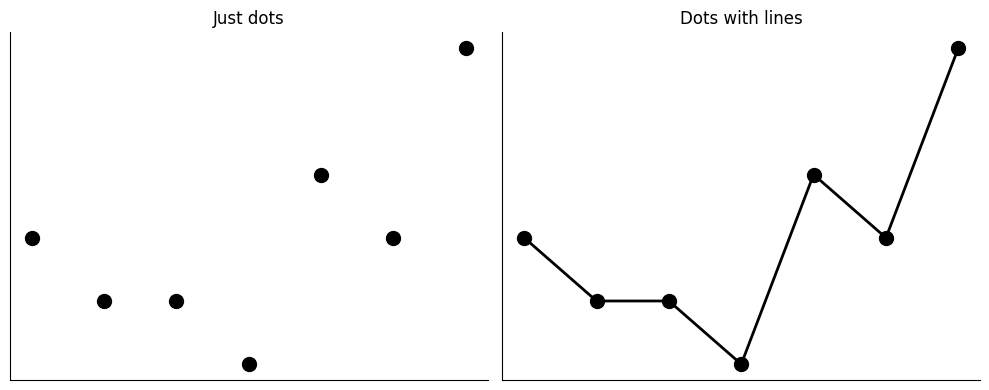

In [31]:
import matplotlib.pyplot as plt

x = [1, 2, 3, 4, 5, 6, 7]
y = [5, 4, 4, 3, 6, 5, 8]

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].scatter(x, y, s=100, color='black')
axs[0].set_title('Just dots')
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].plot(x, y, marker='o', markersize=10, color='black', linewidth=2)
axs[1].set_title('Dots with lines')
axs[1].set_xticks([])
axs[1].set_yticks([])

for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()
